# 11주차 : 동적 프로그래밍(Dynamic Programming DP) 알고리즘

- <a href="#1.동적프로그래밍개념">1. 동적 프로그래밍 개념</a>
- <a href="#2.기본 원리와 구조">2. 기본 원리와 구조</a>
- <a href="#3.동적프로그래밍예제">3. 동적 프로그래밍 예제</a>

------------------------------

## <a name="1.동적프로그래밍개념">1. 동적 프로그래밍 개념</a>

### 1-1.동적 프로그래밍의 필요성
- 피보나치 수열 표현 (중복 계산의 문제)

In [58]:
def fibonacci(n):
    if n <= 1:
        return n
    return fibonacci(n-1) + fibonacci(n-2)    # 중복 문제가 발생할 수 있다
fibonacci(10)


55

- 메모이제이션(memorization) 방법 사용 : Top-down 방식

In [59]:
def fibonacci(n):
    # -메모이제이션-
    mem = [None] * (n+1)
    if mem[n] == None:  # 처음 푸는 문제이면, 
        if n <= 1:      # 풀어서 메모리에 저장함
            mem[n] = n
        else:
            mem[n] =  fibonacci(n-1) + fibonacci(n-2)
    return mem[n] 
fibonacci(10)


55

- 중복 문제를 해결한 방법(선형시간에 끝나는 방법 )

In [60]:
def fibonacci(n):
    # -메모이제이션-
    

    # -점화식-
    

    
fibonacci(10)


55

In [61]:
def fibonacci(n):
    fib = [0, 1]  # 0번째와 1번째 피보나치 수를 미리 계산
    for i in range(2, n+1):
        fib.append(fib[i-1] + fib[i-2])        
    return fib[n]
fibonacci(10)


55

--------------

## <a name="2.기본 원리와 구조">2. 기본 원리와 구조</a>

----

## <a name="3.동적프로그래밍예제">3. 동적 프로그래밍 예제</a>

### 3-1.최장 공통 부분순서(LCS Longest Common Subsequence)
* 두 문자열에 공통적으로 들어있는 공통 부분순서 중 가장 긴 것을 찾는 것
* 부분순서의 예
    - <bcdb>는 문자열 <abcbdab>의 부분순서
* 공통 부분순서의 예
    - <bca>는 문자열 <abcbdab>와 <bdcaba>의 공통 부분순서
* 최장 공통 부분순서(Longest Common Subsequence LCS)
    - 공통 부분순서들 중 가장 긴 것
    - 예: <bcba>- 는 문자열 <abcbdab>와 <bdcaba>의 최장 공통 부분순서

#### 3-1-1.LCS의 길이 (분할 정복 알고리즘)

In [62]:
def lcs_recur(X, Y, m, n): 
    if m == 0 or n == 0: 		# base case 
        return 0 
    elif X[m-1] == Y[n-1]: 		# case 1: x_m == y_n 
                                # 마지막 문자가 같으면 이를 제외하고 계산한 다음 1을 더한 값이 OK
        return 1 + lcs_recur(X, Y, m-1, n-1) 
    else: 						# case 2
                                # 마지막 문자가 서로 다르면, 두 가지를 계산해보고 더 큰쪽이 OK
        return max(lcs_recur(X, Y, m, n-1), lcs_recur(X, Y, m-1, n)) 


In [63]:
# LCS 테스트 프로그램
X = "GAME OVER"
Y = "HELLO WORLD"
print("X = ", X)
print("Y = ", Y)
print("LCS(분할 정복) : ", lcs_recur(X , Y, len(X), len(Y)))

X =  GAME OVER
Y =  HELLO WORLD
LCS(분할 정복) :  4


#### 3-1-2. LCS의 길이 (동적 프로그래밍 알고리즘)

In [1]:
# LCS의 길이(동적 계획법)
def lcs_dp(X , Y): 
    # -메모이제이션-

    

    # -점화식-
    m = len(X)
    n = len(Y)
    L = [[None]*(n+1) for _ in range(m+1)]

    
                
    for i in range(m+1):
        print(L[i])
    # L[m][n] contains the length of LCS of X[0..n-1] & Y[0..m-1] 
    print(f"LCS = {lcs_dp_traceback(X, Y, L)}")
    
    return L[m][n] 

# LCS 테이블에서 LCS를 추적하는 알고리즘
def lcs_dp_traceback(X, Y, L):
    lcs = ""													# ①
    i = len(X)													# ②
    j = len(Y)													# ② 
    print(i, j)
    while i > 0 and j > 0:
        v = L[i][j] 
        if v > L[i][j-1] and v > L[i-1][j]  and v > L[i-1][j-1]:# ③
            i -= 1
            j -= 1
            lcs = X[i] + lcs

        elif v == L[i][j-1] and v > L[i-1][j]: j -= 1			# ④
        else : i -= 1											# ⑤

    return lcs


In [65]:
X = "GAME OVER"
Y = "HELLO WORLD"
print("X = ", X)
print("Y = ", Y)
print("LCS(동적 프로그래밍) : ", lcs_dp(X , Y))

X =  GAME OVER
Y =  HELLO WORLD
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2]
[0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3]
[0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3]
[0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3]
[0, 0, 1, 1, 1, 2, 2, 2, 3, 4, 4, 4]
9 11
LCS = E OR
LCS(동적 프로그래밍) :  4


In [66]:
X = "ABCDGH"
Y = "AEDFHR"
print("LCS(동적 계획)", lcs_dp(X , Y) )

[0, 0, 0, 0, 0, 0, 0]
[0, 1, 1, 1, 1, 1, 1]
[0, 1, 1, 1, 1, 1, 1]
[0, 1, 1, 1, 1, 1, 1]
[0, 1, 1, 2, 2, 2, 2]
[0, 1, 1, 2, 2, 2, 2]
[0, 1, 1, 2, 2, 3, 3]
6 6
LCS = ADH
LCS(동적 계획) 3


In [67]:
X = "AGGTAB"
Y = "GXTXAYB"
print("LCS(동적 계획)", lcs_dp(X , Y) )

[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 1, 1]
[0, 1, 1, 1, 1, 1, 1, 1]
[0, 1, 1, 1, 1, 1, 1, 1]
[0, 1, 1, 2, 2, 2, 2, 2]
[0, 1, 1, 2, 2, 3, 3, 3]
[0, 1, 1, 2, 2, 3, 3, 4]
6 7
LCS = GTAB
LCS(동적 계획) 4


-------------------

### 3-2.배낭 채우기(Knapsack problem)
- 한정된 용량의 배낭에 최대 가치를 가진 물건들을 담는 방법을 찾는 것

#### 3-2-1. 0/1 배낭 채우기(분할 정복)

In [73]:
# 0/1 배낭 채우기(분할 정복)
def knapSack_bf(W, wt, val, n): 
    if n == 0 or W == 0 :       # 기반 상태. 물건이 없거나 용량이 0이면
        return 0                # 전체 가치 합은 0이 됨
  
    if (wt[n-1] > W):                           # 넣을 수 없음
        return knapSack_bf(W, wt, val, n-1)     # 나머지 항목들로 다시 처리
  
    else: 
        valWith = val[n-1] + knapSack_bf(W-wt[n-1], wt, val, n-1) # 넣은 경우
        valWithout = knapSack_bf(W, wt, val, n-1)                 # 넣지 않은 경우
        return max(valWith, valWithout)


In [74]:
val = [60, 100, 190, 120, 200, 150] 
wt = [2, 5, 8, 4, 7, 6] 
W = 18
n = len(val) 
print("0/1 배낭문제(분할 정복): ", knapSack_bf(W, wt, val, n)) 

0/1 배낭문제(분할 정복):  480


#### 3-2-2. 0/1 배낭 채우기(동적 프로그래밍)

In [71]:
# 0/1 배낭 채우기(동적 프로그래밍)
def knapSack_dp(W, wt, val, n): 
    # -메모이제이션-
    # 테이블 생성 및 0으로 초기화(W=0, n=0인 경우 모두 0)

    

    # -점화식-
    

    
  
    return A[n][W]                  # 최종 결과가 저장됨


In [72]:
print("0/1 배낭문제(동적 계획): ", knapSack_dp(W, wt, val, n)) 

0/1 배낭문제(동적 계획):  480


-----------------------

### 3-3. Bellman-Ford Algorithm(최단 경로 찾기)

* **핵심 아이디어** : 그래프의 모든 간선을 반복적으로 완화(relax)하여, 특정 시작 정점에서 다른 모든 정점까지의 최단 경로를 찾는 것. 음수 가중치가 있는 그래프에서도 작동하며, 음수 사이클이 존재하는 경우 이를 탐지할 수 있다.
* 연산 과정: 간선 완화는 간선의 가중치를 사용하여 정점 간의 최단 거리를 갱신하는 과정(모든 간선을 순회하며, 현재 거리보다 더 짧은 경로가 있다면 distances 배열을 업데이트)
* 시간 복잡도: 시간 복잡도 O(V𝐸) 
* 중요 특징 요소
    - **음의 가중치 허용** : 모든 간선의 가중치가 0 이상인 그래프에서 작동. 
    - **사이클 감지** : 주어진 시작 정점에서 다른 모든 정점까지의 최단 경로를 찾는다.


#### 3-3-1.동적 프로그래밍

1. (거리)초기화 **(메모이제이션)**
    - ① 모든 노드의 거리를 무한대로 설정하고, 
    - ② 시작 노드의 거리는 0으로 설정
3. 간선 완화 **(점화식)**
    - ① 전체 간선에 대해서 시행한다.
    - ② 현재 노드 u의 거리에 v까지의 간선 가중치를 더한 값이 v의 현재 거리보다 작으면 v의 거리를 u의 거리에 간선 가중치를 더한 값으로 갱신
5. 음수 사이클 탐지
    - ① 모든 간선에 대해서 한 번 더 반복하여 거리가 갱신되는 노드가 있다면
    - (현재 노드 u의 거리에 v까지의 간선 가중치를 더한 값이 v의 현재 거리보다 작은 것이 존재하면) 음의 사이클이 존재한다고 판단한다.

In [79]:
class Graph:
    def __init__(self, vertices):
        self.V = vertices  # 정점의 수
        self.graph = []    # 그래프를 나타내는 리스트

    # 간선 추가
    def add_edge(self, u, v, w):
        self.graph.append([u, v, w])

    # 최단 경로 찾기
    def bellman_ford(self, start):
        # -메모이제이션-
        # 거리 초기화
        distance = {node: float('inf') for node in self.vertices}
        distance[start] = 0
        shortest_path_tree = {node: None for node in self.vertices}

        # -점화식-
        # 간선 완화
        for _ in range(self.V - 1):
            for u, v, w in self.graph:
                if distance[u] != float('inf') and distance[u] + w < distance[v]:
                    distance[v] = distance[u] + w
                    shortest_path_tree[v] = u

        # 음수 사이클 탐지
        for u, v, w in self.graph:
            if distance[u] != float('inf') and distance[u] + w < distance[v]:
                print("Graph contains negative weight cycle")
                return None, None

        return distance, shortest_path_tree

    # 거리 출력
    def print_solution(self, distance):
        print("node Distance from Source")
        for node in distance:
            print(f"{node}\t\t{distance[node]}")

# 그래프 정의 및 간선 추가
vertices = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
g = Graph(len(vertices))
edges = [
    ('A', 'B', 11), ('A', 'C', 8), ('A', 'D', 9),
    ('B', 'E', 8), ('B', 'G', 8),
    ('C', 'F', 10),
    ('D', 'B', 3), ('D', 'C', -15),('D', 'F', 1),
    ('E', 'G', -7),
    ('F', 'H', 2),
    ('G', 'D', 12), ('G', 'H', 5),
    ('H', 'E', 4)
]
for u, v, w in edges:
    g.add_edge(u, v, w)
g.vertices = vertices

# 벨만-포드 알고리즘 실행
distances, shortest_path_tree = g.bellman_ford('A')
if distances is not None and shortest_path_tree is not None:
    g.print_solution(distances)


node Distance from Source
A		0
B		11
C		-6
D		9
E		10
F		4
G		3
H		6


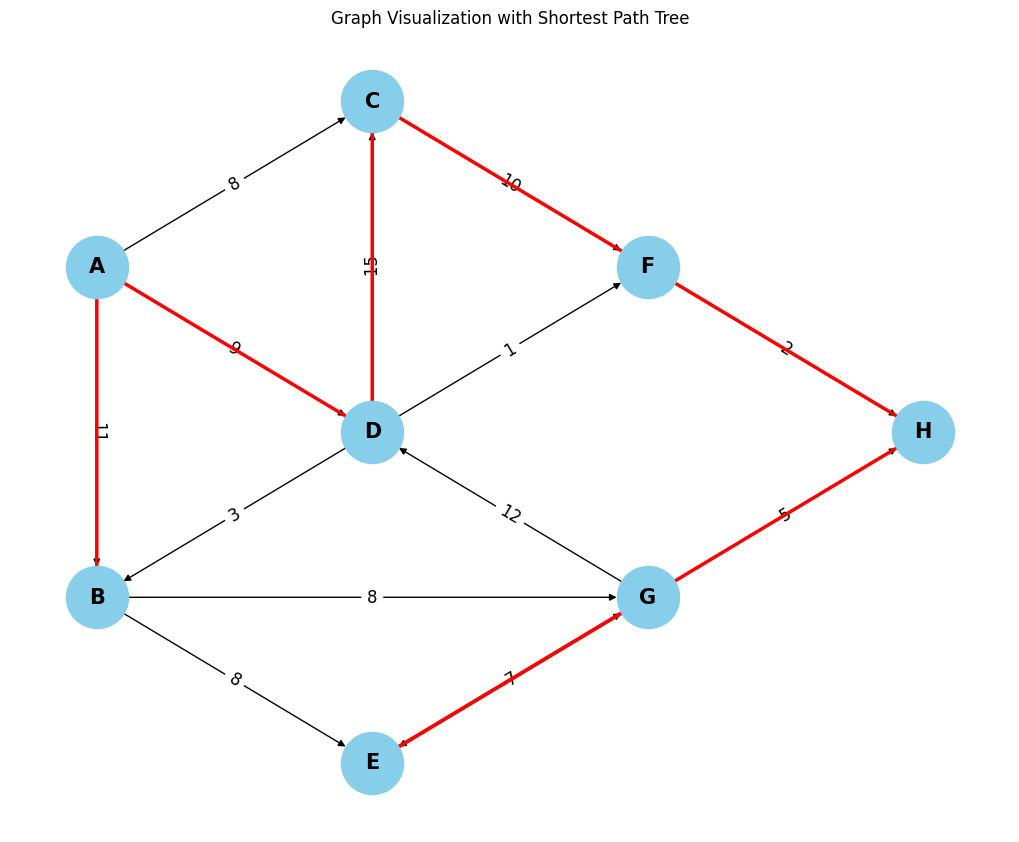

In [81]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph(graph, shortest_path_tree, start, pos=False):
    G = nx.DiGraph()
    for node in graph:
        for neighbor, weight in graph[node].items():
            if weight != float('inf'):
                G.add_edge(node, neighbor, weight=weight)
    
    if not pos:
        pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')
    
    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=15, font_weight='bold', arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=12)
    
    # Highlight the shortest path tree
    if start in shortest_path_tree.values():
        path_edges = [(shortest_path_tree[node], node) for node in shortest_path_tree if shortest_path_tree[node]]
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2.5)
    
    plt.title("Graph Visualization with Shortest Path Tree")
    plt.show()


# 그래프 시각화
if distances is not None and shortest_path_tree is not None:
    # draw_graph(vertices, edges, shortest_path_tree, 'A')
    draw_graph(graph, shortest_path_tree, 'A', pos)

----

### 3-4. 행렬 경로 문제 
- 주어진 행렬의 왼쪽 상단에서 시작해 오른쪽 하단으로 이동하며
- 각 셀의 값들의 합이 최대가 되도록 경로를 찾는 문제
- 이동은 오른쪽 또는 아래로만 가능하다.

* 행렬 경로 문제 정의
    - 주어진 m x n 행렬에서 각 셀에는 숫자가 있음
    - 시작 위치는 행렬의 왼쪽 상단(0,0)이며, 목표 위치는 행렬의 오른쪽 하단(m-1, n-1)임
    - 경로의 합을 최대화하는 것이 목표임.
* 동적 프로그래밍 접근법
    - 동적 프로그래밍을 사용하여 이 문제를 해결할 때는 각 셀(i, j)에 대해 해당 셀까지 도달했을 때의 최대 경로의 합을 저장하는 2차원 리스트 dp를 사용함.    
    - 점화식 :$dp[i][j]=max(dp[i−1][j],dp[i][j−1])+matrix[i][j] $
    - 이 식은 (i, j) 셀에 도달하기 위해서는 왼쪽(i, j-1) 또는 위쪽(i-1, j) 셀에서 올 수 있다는 것을 나타냄
    - 각 셀에 도달할 때의 최대 합을 계산하여 저장함

#### 3-4-1. 재귀 방법

In [88]:
def max_path_sum(matrix):
    if not matrix or not matrix[0]:
        return 0

    rows, cols = len(matrix), len(matrix[0])
    memo = [[-1] * cols for _ in range(rows)]

    def calculate_max_path(i, j):
        # 범위를 벗어나는 경우
        if i < 0 or j < 0:
            return 0

        # 이미 계산된 셀의 경우
        if memo[i][j] != -1:
            return memo[i][j]

        # 재귀적으로 왼쪽과 위쪽의 최대 경로 합을 계산
        max_up = calculate_max_path(i - 1, j) if i > 0 else 0
        max_left = calculate_max_path(i, j - 1) if j > 0 else 0

        # 현재 셀을 포함한 최대 경로 합 계산
        memo[i][j] = max(max_up, max_left) + matrix[i][j]
        
        return memo[i][j]

    # 마지막 셀부터 계산 시작
    return calculate_max_path(rows - 1, cols - 1)

# 예제 행렬
matrix = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

# 최대 경로 합 출력
print("Maximum path sum:", max_path_sum(matrix))

Maximum path sum: 29


#### 3-4-1. 동적 프로그래밍

In [89]:
def max_path_sum(matrix):
    if not matrix or not matrix[0]:
        return 0
    
    rows, cols = len(matrix), len(matrix[0])

    # -메모이제이션-
    
    
    # 초기 위치 설정
    
    
    # 첫 번째 행 채우기
    for j in range(1, cols):
        dp[0][j] = dp[0][j-1] + matrix[0][j]
    
    # 첫 번째 열 채우기
    for i in range(1, rows):
        dp[i][0] = dp[i-1][0] + matrix[i][0]
    
    # 나머지 셀 채우기

    

    # db 시각화를 위해 출력
    for i in range(len(dp)):
        print(dp[i])
        
    # 오른쪽 하단 셀에는 최대 합이 저장됨
    return dp[rows-1][cols-1]

# 예제 행렬
matrix = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

# 최대 경로 합 출력
print("Maximum path sum:", max_path_sum(matrix))

[1, 3, 6]
[5, 10, 16]
[12, 20, 29]
Maximum path sum: 29
